D:\OneDrive - Cardiff University\05 - Python\13 - ABM
D:
OneDrive - Cardiff University
05 - Python
13 - ABM
D:\


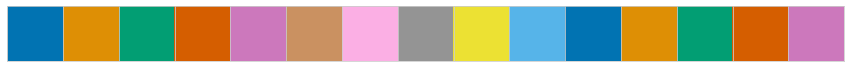

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys
from matplotlib.ticker import MaxNLocator

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "png"
dpi = 1000
figsize = (12, 3.5)
figsize_map = (10, 6)
sns.palplot(sns.color_palette())

markers = ['x', 'o', '^', 's', '*', 'v']

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

# Historical data from DUKES report https://www.gov.uk/government/statistics/electricity-chapter-5-digest-of-united-kingdom-energy-statistics-dukes

### Generation

In [4]:
generation_file = r"D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\04 - Data\DUKES_5.6.xls"
historical_generation = pd.read_excel(generation_file, sheet_name = "Time series format", index_col=0, header=[2])
historical_generation = historical_generation.iloc[69:82, 14:]

categories ={'Hydro (natural flow)':'Hydro', 
             '- of which, Onshore':'Wind Onshore',    
            '- of which, Offshore':'Wind Offshore',   
             'Thermal renewables (4)':'Biomass',
            'Other fuels (5)':'Other',
            'Oil': 'Other', 
            'Pumped storage':'Hydro',
             'Shoreline wave / tidal': 'Other',
             'Wind': 'Other'
            }

historical_generation['Category'] = historical_generation.index
historical_generation['Category'].replace(categories, inplace=True)
historical_generation = historical_generation.groupby(["Category"]).sum()
max_historical_gen = historical_generation.sum().max()*(1+10/100)/1000

historical_generation.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Category,,,,,,,,,,,
Biomass,12261.26,13313.02,14733.84,18099.85,22619.07,29256.98,30065.67,31894.18,34966.83,37305.43,39310.99
Coal,107594.24,108442.27,142792.00,130257.90,100238.85,75878.22,30668.60,22530.45,16831.40,6953.67,5504.41
Gas,175653.41,146499.02,100169.57,95842.77,100892.18,99875.42,143356.08,136745.82,131489.78,131931.49,111431.34
Hydro,6741.81,8597.31,8276.11,7605.36,8771.28,9036.69,8329.63,8753.90,7941.72,7602.69,8156.14
Nuclear,62139.67,68980.45,70405.07,70606.88,63747.95,70344.90,71726.08,70336.43,65063.85,56183.93,50278.35


In [5]:
altair_df = historical_generation.unstack().to_frame().reset_index()
altair_df.columns = ["Years", "Technology", "Generation_TWh"]
altair_df

,Years,Technology,Generation_TWh
0,2010,Biomass,12261.26
1,2010,Coal,107594.24
2,2010,Gas,175653.41
3,2010,Hydro,6741.81
4,2010,Nuclear,62139.67
...,...,...,...
94,2020,Nuclear,50278.35
95,2020,Other,84157.78
96,2020,Solar,13157.99
97,2020,Wind Offshore,40681.08


In [6]:
import altair as alt
#tutorial from https://www.datacamp.com/community/tutorials/altair-in-python

select_year = alt.selection_single(
    name='Select', fields=['Years'], init={'Years': 2010},
    bind=alt.binding_range(min=2010, max=2020, step=1)
)

# load a simple dataset as a pandas DataFrame

alt.Chart(altair_df).mark_bar().encode(
    x='Technology',
    y='Generation_TWh',
    color='Technology',
).add_selection(select_year).transform_filter(select_year)

alt.Chart(...)

In [1010]:
cols_to_plot = [x for x in historical_generation.index if "Other" not in x] +["Other"]
cols_to_plot

['Biomass',
 'Coal',
 'Gas',
 'Hydro',
 'Nuclear',
 'Solar',
 'Wind Offshore',
 'Wind Onshore',
 'Other']

(0.0, 431.589279)

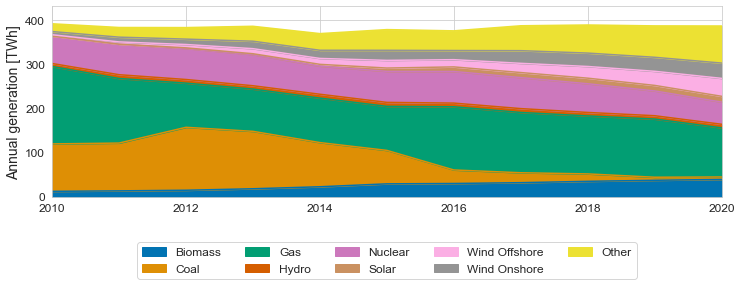

In [1011]:
f, ax = plt.subplots(figsize=figsize)

(historical_generation.loc[cols_to_plot,:].T/1000).plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Annual generation [TWh]")
ax.legend(bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=5)
ax.set_ylim(0, max_historical_gen)
# f.savefig(path_save_figures+os.path.sep+"Annual_Generation."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

## Capacity
Small-scale hydro, wind and solar photovoltaics capacity are shown on declared net capability basis, and are de-rated to account for intermittency, by factors of 0.365, 0.43 and 0.17 respectively.

In [1012]:
capacity_file = r"D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\04 - Data\DUKES_5.7.xls"
historical_capacity = pd.read_excel(capacity_file, sheet_name = "5.7", index_col=0, header=[4])
historical_capacity = historical_capacity.iloc[27:40, 14:]
historical_capacity
max_historical_cap = historical_capacity.sum().max()*(1+10/100)/1000
for c in historical_capacity.columns:
    historical_capacity[c] = pd.to_numeric(historical_capacity[c])/1000

categories ={'Hydro (natural flow)':'Hydro', 
             'Nuclear stations': 'Nuclear',
             'Coal fired': 'Coal',
             'Oil fired': 'Other',
             'Gas fired':'Gas',
             'Mixed or dual fuelled':'Other',
             'Wave and tidal': 'Other',
             'Onshore wind':'Wind Onshore',    
            'Offshore wind':'Wind Offshore',   
             'Bioenergy and waste':'Biomass',
            'Other fossil fuels':'Other',
             'Pumped hydro': 'Hydro'
            }

historical_capacity['Category'] = historical_capacity.index
historical_capacity['Category'].replace(categories, inplace=True)
historical_capacity = historical_capacity.groupby(["Category"]).sum()

In [1013]:
print(historical_capacity.loc['Solar', 2010]*1000/0.17)
print(historical_capacity.loc['Hydro', 2010]*1000/0.365)
print(historical_capacity.loc['Wind Offshore', 2010]*1000/0.43)
print(historical_capacity.loc['Wind Onshore', 2010]*1000/0.43)
historical_capacity.loc[:, 2010]

95.05882352941175
11702.109589041098
1341.4418604651164
4079.7906976744184


Category
Biomass           1.88768
Coal             23.68221
Gas              35.56366
Hydro             4.27127
Nuclear          10.86500
Other            11.77620
Solar             0.01616
Wind Offshore     0.57682
Wind Onshore      1.75431
Name: 2010, dtype: float64

In [1014]:
print(historical_capacity.loc['Solar', 2020]*1000/0.17)

13462.470588235292


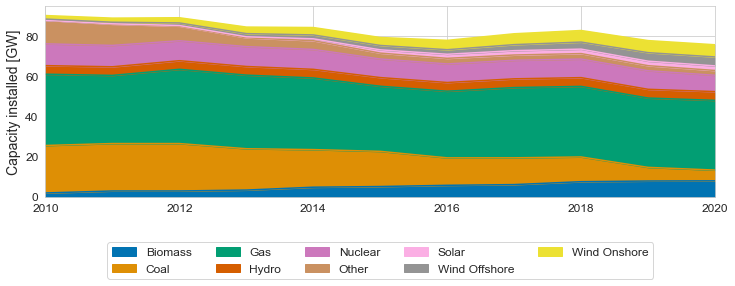

In [1015]:
f, ax = plt.subplots(figsize=figsize)

historical_capacity.T.plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Capacity installed [GW]")

ax.legend(bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=5)
# ax.set_ylim(0, max_historical_cap)
# f.savefig(path_save_figures+os.path.sep+"Capacity_Installed."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [1016]:
historical_capacity_change = historical_capacity.T-historical_capacity.T.shift()
historical_capacity_change

Category,Biomass,Coal,Gas,Hydro,Nuclear,Other,Solar,Wind Offshore,Wind Onshore
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,0.98670,-0.01684,-1.56612,0.02306,-0.202,-1.17269,0.15388,0.21363,0.29164
2012,-0.00093,-0.00420,3.03435,0.00527,-0.717,-3.29728,0.12805,0.49759,0.54909
2013,0.46145,-3.04227,-0.31326,0.00583,-0.040,-2.90020,0.20124,0.30122,0.66708
2014,1.42124,-1.85392,-0.98519,0.00753,0.031,-0.06041,0.44044,0.34630,0.42412
2015,0.33401,-1.20915,-3.25651,0.01739,-0.676,-1.40286,0.69244,0.25460,0.27502
2016,0.61102,-3.85731,0.77147,0.01805,0.000,-0.14831,0.39317,0.08600,0.69673
2017,0.35672,-0.33507,1.79716,0.01348,0.000,-0.17551,0.14382,0.72862,0.75878
2018,1.45146,-1.02660,0.16089,0.00276,0.000,0.12012,0.05084,0.51284,0.35603
2019,0.32697,-5.51911,-0.62372,0.00028,0.000,-0.22114,0.02805,0.73426,0.24468


Category
Biomass          1.45146
Coal            -0.00420
Gas              3.03435
Hydro            0.02306
Nuclear          0.03100
Other            0.12012
Solar            0.69244
Wind Offshore    0.73426
Wind Onshore     0.75878
dtype: float64

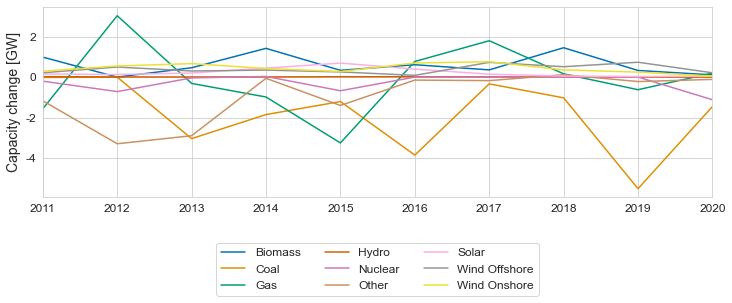

In [1017]:
f, ax = plt.subplots(figsize=figsize)
historical_capacity_change.plot(ax=ax)

ax.margins(0, None)
ax.set_ylabel("Capacity change [GW]")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.legend(bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=3)
historical_capacity_change.max()

## Fuel prices

In [1018]:
def loadFuelCostFile(fuel_name, fileIN):
    if(fuel_name=="Coal"): # coal
        fileIN = fileIN/1000 # tonnes to kg
        fileIN = fileIN/2.46 # 1 kg of coal produces 2.46 kWh
        fileIN = fileIN*0.77 # USD to GBP
    elif(fuel_name=='NaturalGas'): # CCGT and OCGT
        fileIN = fileIN/100.0 # p/ therm to gbp/therm
        fileIN = fileIN/29.31 # therms to kWh, 1 therm = 29.31 kWh

    return fileIN

def getPathWholesalePriceOfFuel(path, fuel, year):
    for subdir, dirs, files in os.walk(path):
        for file in files:
#             print(file)
            if str(year) in file and fuel in file:
                # print(file)
                return subdir + os.sep + file
    return False

In [1019]:
path_wholesale_price = r'D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM code - Dec 2021\Code_WH\WholesaleEnergyPrices'

fuels= ['Coal', 'NaturalGas', 'WasteWood']

frames = []
for f in fuels:
    fuelPricePath = getPathWholesalePriceOfFuel(path_wholesale_price, f, 2010)
    print(fuelPricePath)
    test = pd.read_csv(fuelPricePath, header=None)
    frames.append(loadFuelCostFile(f, test.values.flatten()))

D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM code - Dec 2021\Code_WH\WholesaleEnergyPrices\Coal2010_2050_dollarPerTonne.txt
D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM code - Dec 2021\Code_WH\WholesaleEnergyPrices\NaturalGas2010_2050_pencePerTherm.txt
D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM code - Dec 2021\Code_WH\WholesaleEnergyPrices\WasteWood2010_2050_GBPPerkWh.txt


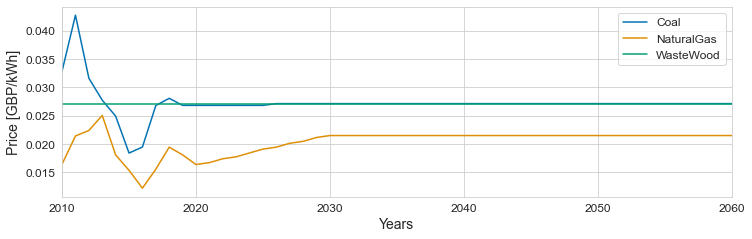

In [1020]:
f, ax = plt.subplots(figsize=figsize)
pd.DataFrame(frames, index=fuels, columns = np.arange(2010, 2061)).T.plot(ax=ax)
ax.set_ylabel("Price [GBP/kWh]")
ax.set_xlabel("Years")
ax.margins(0, None)

## Modelled data

In [1021]:
path_results = r'D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM code - Dec 2021\Code_WH\Results\2050'
path_save_figures = path_results+os.path.sep+"Figures"

last_year = 2021

In [1022]:
## Generation per technology type

In [1023]:
frames = []
cols = []
for year in range(2010, last_year, 1):
    temp_filename = "allGenPerTechnology_"+str(year)+".csv"
    temp_df = pd.read_csv(path_results+os.path.sep+temp_filename, index_col=0)

    cols.append(year)
    frames.append(temp_df.sum())
df_gen = pd.concat(frames, axis=1) 
df_gen.columns = cols    
df_gen = df_gen/1000000000 #kWh to TWh 
name_of_tech = df_gen.index

(0.0, 431.589279)

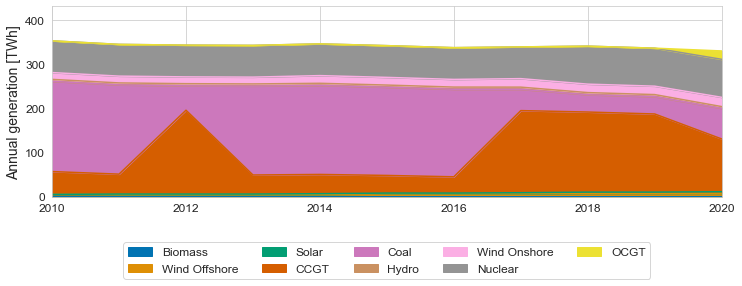

In [1024]:
f, ax = plt.subplots(figsize=figsize)

df_gen.T.plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Annual generation [TWh]")
ax.legend(bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=5)
ax.set_ylim(0, max_historical_gen)
# f.savefig(path_save_figures+os.path.sep+"Annual_Generation."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [1025]:
df_gen["Category"] = df_gen.index
categories ={'CCGT':'Gas', 
             'OCGT':'Gas',                              
            }
df_gen['Category'].replace(categories, inplace=True)
df_gen = df_gen.groupby(["Category"]).sum()

In [1026]:
new_cols_to_plot = [x for x in cols_to_plot if x in df_gen.index]

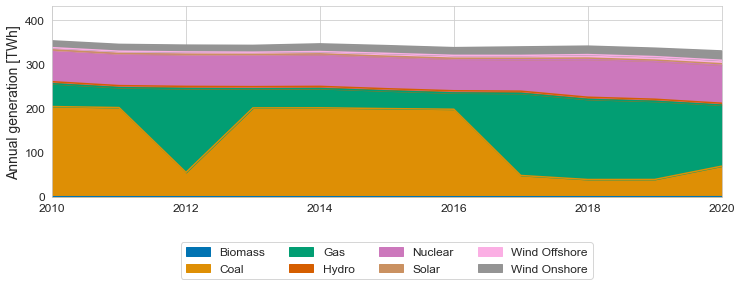

In [1027]:
f, ax = plt.subplots(figsize=figsize)

df_gen.loc[new_cols_to_plot, :].T.plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Annual generation [TWh]")
ax.legend(bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=4)
ax.set_ylim(0, max_historical_gen)
f.savefig(path_save_figures+os.path.sep+"Annual_Generation."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

## Capacity Installed per technology

In [1028]:
frames = []
cols = []
for year in range(2010, last_year, 1):
    temp_filename = "gen_cap_per_type_per_bus_"+str(year)+".csv"
    temp_df = pd.read_csv(path_results+os.path.sep+temp_filename, index_col=0)
    frames.append(temp_df.sum())
    
df_cap = pd.concat(frames, axis=1)
df_cap.columns = np.arange(2010, last_year)
df_cap = df_cap/1000000 # kW to GW
df_cap.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Biomass_Derated_Capacity_kW,1.555558,1.555558,1.555558,1.555558,1.555558,1.555558,1.555558,1.604838,1.654118,1.597798,1.598746
Wind Offshore_Derated_Capacity_kW,0.321888,0.321888,0.321888,0.321888,0.321888,0.405888,0.405888,0.405888,0.489888,0.489888,0.489888
Solar_Derated_Capacity_kW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCGT_Derated_Capacity_kW,23.019700,23.019700,23.019700,23.019700,23.019700,23.019700,23.019700,22.825050,22.931300,22.352450,13.876250
Coal_Derated_Capacity_kW,25.002560,25.002560,25.002560,25.002560,25.002560,25.002560,25.002560,25.002560,25.002560,24.756160,11.981200


Biomass_Capacity_kW           1816.757333
Wind Offshore_Capacity_kW     2041.200000
Solar_Capacity_kW             3977.688000
CCGT_Capacity_kW             16325.000000
Coal_Capacity_kW             13615.000000
Hydro_Capacity_kW             1283.000000
Wind Onshore_Capacity_kW      7589.000000
Nuclear_Capacity_kW          12147.000000
OCGT_Capacity_kW             16145.401000
Name: 2020, dtype: float64

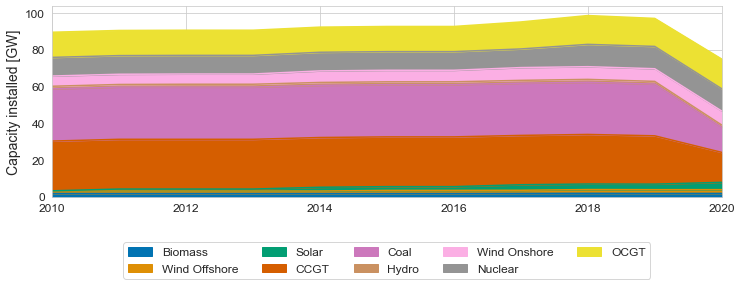

In [1029]:
f, ax = plt.subplots(figsize=figsize)
cap_cols = [c+"_Capacity_kW" for c in name_of_tech]
df_cap.loc[cap_cols, :].T.plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Capacity installed [GW]")

handles, labels = ax.get_legend_handles_labels()
labels = [l.replace("_Capacity_kW", "") for l in labels]
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=5)

f.savefig(path_save_figures+os.path.sep+"Capacity_Installed."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)
df_cap.loc[cap_cols, 2020]*1000

In [1030]:
df_cap["Category"] = df_cap.index
categories ={'CCGT':'Gas', 
             'OCGT':'Gas',                              
            }
df_cap['Category'] = df_cap['Category'].replace(categories, regex=True)
df_cap = df_cap.groupby(["Category"]).sum()

derating_factors = {'Solar': 0.17, 'Wind Offshore':0.43,'Wind Onshore':0.43, 'Hydro':0.365} # derating factors used in DUKES statistics for small hydro, wind and solar
for k, v in derating_factors.items():
    df_cap.loc[k+"_Capacity_kW", :]= df_cap.loc[k+"_Capacity_kW", :]*v

df_cap

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Category,,,,,,,,,,,
Biomass_Capacity_kW,1.767680,1.767680,1.767680,1.767680,1.767680,1.767680,1.767680,1.823680,1.879680,1.815680,1.816757
Biomass_Derated_Capacity_kW,1.555558,1.555558,1.555558,1.555558,1.555558,1.555558,1.555558,1.604838,1.654118,1.597798,1.598746
Coal_Capacity_kW,28.412000,28.412000,28.412000,28.412000,28.412000,28.412000,28.412000,28.412000,28.412000,28.132000,13.615000
Coal_Derated_Capacity_kW,25.002560,25.002560,25.002560,25.002560,25.002560,25.002560,25.002560,25.002560,25.002560,24.756160,11.981200
Gas_Capacity_kW,40.766070,40.766070,40.766070,40.766070,40.766070,40.766070,40.766070,41.537070,42.662070,41.540401,32.470401
Gas_Derated_Capacity_kW,35.609044,35.609044,35.609044,35.609044,35.609044,35.609044,35.609044,36.334394,37.360644,36.376379,28.730019
Hydro_Capacity_kW,0.519760,0.519760,0.567210,0.567210,0.567210,0.567210,0.567210,0.567210,0.567210,0.542390,0.468295
Hydro_Derated_Capacity_kW,1.196160,1.196160,1.305360,1.305360,1.305360,1.305360,1.305360,1.305360,1.305360,1.248240,1.077720
Nuclear_Capacity_kW,10.147000,10.147000,10.147000,10.147000,10.147000,10.147000,10.147000,10.147000,12.147000,12.147000,12.147000


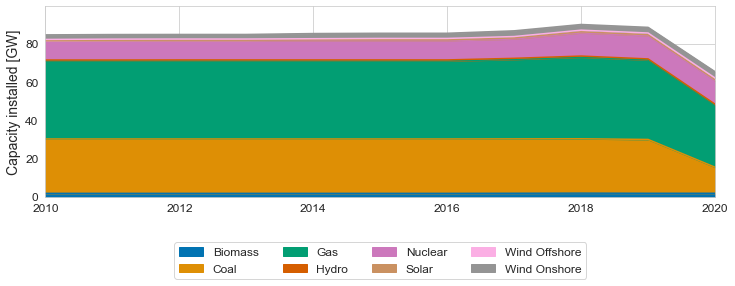

In [1031]:
f, ax = plt.subplots(figsize=figsize)
cap_cols = [c+"_Capacity_kW" for c in new_cols_to_plot]
df_cap.loc[cap_cols, :].T.plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Capacity installed [GW]")

ax.set_ylim(0, max_historical_cap)

handles, labels = ax.get_legend_handles_labels()
labels = [l.replace("_Capacity_kW", "") for l in labels]
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=4)

f.savefig(path_save_figures+os.path.sep+"Capacity_Installed."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [1032]:
capacityPerType = pd.read_csv(path_results+os.path.sep+"gen_capacity_per_type.csv", index_col=0)
capacityPerType.head()

,Biomass_Derated_Capacity_kW,Wind Offshore_Derated_Capacity_kW,Solar_Derated_Capacity_kW,CCGT_Derated_Capacity_kW,Coal_Derated_Capacity_kW,Hydro_Derated_Capacity_kW,Wind Onshore_Derated_Capacity_kW,Nuclear_Derated_Capacity_kW,OCGT_Derated_Capacity_kW,Biomass_Capacity_kW,Wind Offshore_Capacity_kW,Solar_Capacity_kW,CCGT_Capacity_kW,Coal_Capacity_kW,Hydro_Capacity_kW,Wind Onshore_Capacity_kW,Nuclear_Capacity_kW,OCGT_Capacity_kW
2010,1555558.4,321888.0,0.0,23019700.0,25002560.0,1196160.0,945880.0,8219070.0,12589344.4,1767680.0,1341200.0,111000.0,27082000.0,28412000.0,1424000.0,5564000.0,10147000.0,13684070.0
2011,1555558.4,321888.0,0.0,23019700.0,25002560.0,1196160.0,945880.0,8219070.0,12589344.4,1767680.0,1341200.0,1077672.0,27082000.0,28412000.0,1424000.0,5564000.0,10147000.0,13684070.0
2012,1555558.4,321888.0,0.0,23019700.0,25002560.0,1305360.0,945880.0,8219070.0,12589344.4,1767680.0,1341200.0,1077672.0,27082000.0,28412000.0,1554000.0,5564000.0,10147000.0,13684070.0
2013,1555558.4,321888.0,0.0,23019700.0,25002560.0,1305360.0,945880.0,8219070.0,12589344.4,1767680.0,1341200.0,1077672.0,27082000.0,28412000.0,1554000.0,5564000.0,10147000.0,13684070.0
2014,1555558.4,321888.0,0.0,23019700.0,25002560.0,1305360.0,1068280.0,8219070.0,12589344.4,1767680.0,1341200.0,2044344.0,27082000.0,28412000.0,1554000.0,6284000.0,10147000.0,13684070.0


In [1033]:
capacityChange = capacityPerType-capacityPerType.shift()
cap_cols = [c for c in capacityChange.columns if "Capacity_kW" in c and "Derated" not in c]
cap_cols

['Biomass_Capacity_kW',
 'Wind Offshore_Capacity_kW',
 'Solar_Capacity_kW',
 'CCGT_Capacity_kW',
 'Coal_Capacity_kW',
 'Hydro_Capacity_kW',
 'Wind Onshore_Capacity_kW',
 'Nuclear_Capacity_kW',
 'OCGT_Capacity_kW']

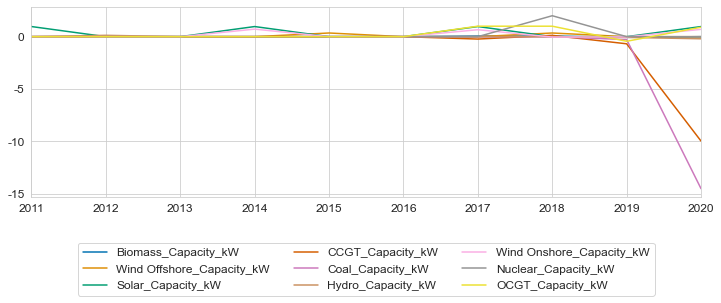

In [1034]:
f, ax = plt.subplots(figsize=figsize)
(capacityChange[cap_cols]/1000000).plot(ax=ax)

ax.margins(0, None)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.legend(bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=3)

### Wholesale price from 2010 to 2050

In [1035]:
df = pd.read_csv(path_results+os.path.sep+"WholesalePrices.csv", index_col=0, parse_dates=True)
df.columns = df.columns.astype(int)
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.030375,0.052855,0.050612,0.042844,0.042102,0.038479,0.041457,0.041580,0.050119,0.054927,0.058906
1,0.030375,0.052855,0.050612,0.042844,0.042102,0.038479,0.041457,0.041580,0.050119,0.054927,0.058906
2,0.030375,0.052855,0.050612,0.042844,0.042102,0.038479,0.041457,0.041580,0.050119,0.054927,0.058906
3,0.030375,0.052855,0.050612,0.042844,0.042102,0.038479,0.041457,0.041580,0.050119,0.054927,0.057965
4,0.030375,0.052855,0.050612,0.042844,0.042102,0.038479,0.041457,0.041580,0.050119,0.054927,0.057965
...,...,...,...,...,...,...,...,...,...,...,...
8755,0.033228,0.052855,0.050612,0.056252,0.043800,0.039454,0.041457,0.050045,0.054124,0.055837,0.058906
8756,0.033228,0.052855,0.050612,0.042844,0.042102,0.038479,0.041457,0.041580,0.050119,0.054927,0.058906
8757,0.030375,0.052855,0.050612,0.042844,0.042102,0.038479,0.041457,0.041580,0.050119,0.054927,0.058906
8758,0.030375,0.052855,0.050612,0.042844,0.042102,0.038479,0.041457,0.041580,0.050119,0.054927,0.058906


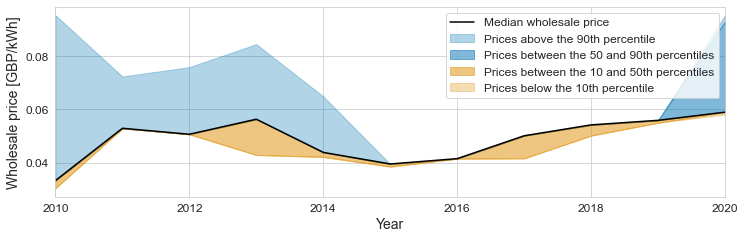

In [1036]:
f, ax = plt.subplots(figsize=figsize)

color1 = sns.color_palette()[0]
color2 = sns.color_palette()[1]

x_arr = df.columns
y_arr_quantile01 = df.quantile(0.1).values
y_arr_quantile09 = df.quantile(0.9).values
y_arr_min = df.min().values
y_arr_max = df.max().values
y_arr_median = df.quantile(0.5).values

ax.plot(x_arr,y_arr_median, color='black', label = "Median wholesale price")
plt.fill_between(x_arr, y_arr_quantile09, y_arr_max, color=color1, alpha = 0.3, label="Prices above the 90th percentile")
plt.fill_between(x_arr, y_arr_median, y_arr_quantile09, color=color1, alpha = 0.5, label="Prices between the 50 and 90th percentiles")
plt.fill_between(x_arr, y_arr_quantile01, y_arr_median,color=color2, alpha = 0.5, label="Prices between the 10 and 50th percentiles")
plt.fill_between(x_arr, y_arr_min, y_arr_quantile01, color=color2, alpha = 0.3, label="Prices below the 10th percentile")
ax.legend()

ax.margins(0, None)

ax.set_xlabel("Year")
ax.set_ylabel("Wholesale price [GBP/kWh]")

f.savefig(path_save_figures+os.path.sep+"WholesaleElectricityPrice2."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)



## Loss of loads and curtailment

In [1037]:
frames_lossOfLoad = {}
frames_curtailement = {}
frames_demand = {}
for year in range(2010, last_year, 1):
    temp_filename = "NetDemand_"+str(year)+".csv"
    temp_df = pd.read_csv(path_results+os.path.sep+temp_filename, index_col=0)
    
    frames_lossOfLoad[year]=temp_df['Loss of load'].values.flatten()
    frames_curtailement[year]=temp_df['Curtailement'].values.flatten()
    frames_demand[year]=temp_df['TotalCustomerCons'].values.flatten()
    
lossOfLoad_df = pd.DataFrame(frames_lossOfLoad)
curtailment_df = pd.DataFrame(frames_curtailement)
demand_df = pd.DataFrame(frames_demand)

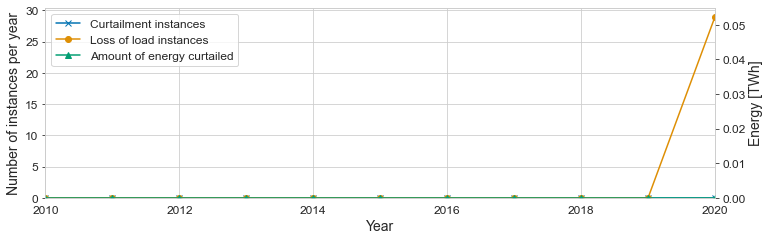

In [1038]:
f, ax = plt.subplots(figsize=figsize)

ax2 = ax.twinx()
curtailment_df[curtailment_df>0].count().plot(ax=ax, label="Curtailment instances", marker=markers[0])
lossOfLoad_df[lossOfLoad_df>0].count().plot(ax=ax, label="Loss of load instances", marker=markers[1])

(curtailment_df.sum()/1000000000).plot(ax=ax2, label="Amount of energy curtailed", color = sns.color_palette()[2], marker=markers[2])

ax.set_ylabel("Number of instances per year")
ax.set_xlabel("Year")
ax.legend()
ax.margins(0, None)
ax.set_ylim(0, None)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))

ax2.set_ylabel("Energy [TWh]")


handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax2.grid(False)
ax.legend(handles=handles+handles2, labels=labels+labels2)
ax2.set_ylim(0, None)

f.savefig(path_save_figures+os.path.sep+"SystemEvaluation."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

## Capacity changes

In [1039]:
sytemEvolution = pd.read_csv(path_results+os.path.sep+"SystemEvolution.csv", index_col=0)

sytemEvolution.head()

,Capacity_kW,Derated_Capacity_kW,Storage_Capacity_kWh,Capacity_Margin_%,Derated_Capacity_Margin_%,Peak_Demand_kW,Emissions_kgCO2,Carbon_Intensity_Target_gCO2/kWh,Carbon_Intensity_gCO2/kWh,Carbon_Price_£/tCO2,Generation_kWh,Capacity_Auction_Estimated_Peak_Demand_kW,Capacity_Auction_Estimated_DeRated_Capacity_kW
2010,89532950.0,72850160.8,0.0,0.449652,0.179536,61761700.0,2.044266e+11,250.0,578.039952,14.0000,3.536548e+11,65945000.0,73081760.8
2011,90499622.0,72850160.8,0.0,0.499324,0.206922,60360300.0,2.000219e+11,250.0,578.716500,15.4000,3.456302e+11,65182000.0,73165760.8
2012,90629622.0,72959360.8,0.0,0.508985,0.214775,60060000.0,1.195063e+11,250.0,347.492358,16.9400,3.439106e+11,64310000.0,72961590.8
2013,90629622.0,72959360.8,0.0,0.511504,0.216803,59959900.0,1.986159e+11,250.0,578.485987,18.6340,3.433375e+11,64637000.0,71483950.8
2014,92316294.0,73081760.8,0.0,0.524365,0.206756,60560500.0,1.989394e+11,250.0,573.681856,20.4974,3.467766e+11,64964000.0,70276330.8


In [1040]:
sytemEvolution.tail()

,Capacity_kW,Derated_Capacity_kW,Storage_Capacity_kWh,Capacity_Margin_%,Derated_Capacity_Margin_%,Peak_Demand_kW,Emissions_kgCO2,Carbon_Intensity_Target_gCO2/kWh,Carbon_Intensity_gCO2/kWh,Carbon_Price_£/tCO2,Generation_kWh,Capacity_Auction_Estimated_Peak_Demand_kW,Capacity_Auction_Estimated_DeRated_Capacity_kW
2016,9.266629e+07,7.316576e+07,0.0,0.569046,0.238859,59059000.0,1.935550e+11,250.000000,572.345214,24.970000,3.381788e+11,62893000.0,57167420.8
2017,9.512397e+07,7.405327e+07,0.0,0.602512,0.247543,59359300.0,1.117474e+11,250.000000,328.767043,27.467000,3.398983e+11,62239000.0,54668972.8
2018,9.861797e+07,7.682651e+07,0.0,0.653011,0.287748,59659600.0,1.017932e+11,250.000000,297.973881,30.756859,3.416179e+11,61585000.0,54785862.8
2019,9.706330e+07,7.547884e+07,0.0,0.649087,0.282371,58858800.0,1.002766e+11,235.294118,297.527968,33.832545,3.370324e+11,61258000.0,41609930.0
2020,7.494005e+07,5.500677e+07,0.0,0.297490,-0.047629,57757700.0,1.152625e+11,220.588235,348.537131,37.215800,3.307037e+11,61040000.0,32398050.0


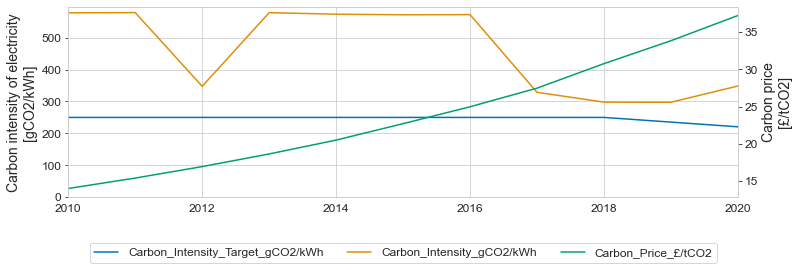

In [1041]:
f, ax = plt.subplots(figsize=figsize)

ax2 = ax.twinx()

sytemEvolution["Carbon_Intensity_Target_gCO2/kWh"].plot(ax=ax, color=sns.color_palette()[0]) 
sytemEvolution["Carbon_Intensity_gCO2/kWh"].plot(ax=ax, color=sns.color_palette()[1]) 
sytemEvolution["Carbon_Price_£/tCO2"].plot(ax=ax2, color=sns.color_palette()[2]) 
ax.margins(0, None)
ax2.grid(False)

handles, labels = ax.get_legend_handles_labels()

handles2, labels2 = ax2.get_legend_handles_labels()


ax.legend(handles=handles+handles2, labels=labels+labels2, bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=5)


ax.set_ylabel('Carbon intensity of electricity\n[gCO2/kWh]')
ax2.set_ylabel('Carbon price\n[£/tCO2]')
ax.set_ylim(0, None)
f.savefig(path_save_figures+os.path.sep+"Carbon_intensity_price."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

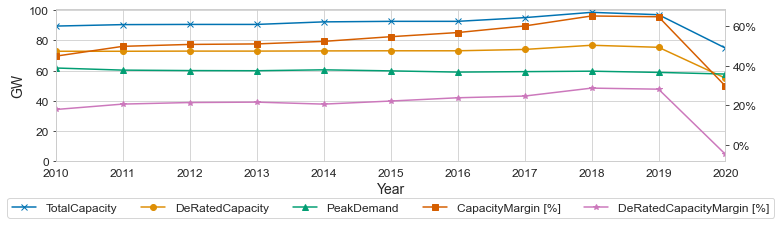

In [1042]:
f, ax = plt.subplots(figsize=figsize)

ax2 = ax.twinx()

x_arr = sytemEvolution.index

yearlyTotCap = sytemEvolution["Capacity_kW"].values/1000000
yearlyDeRCap = sytemEvolution["Derated_Capacity_kW"].values/1000000
yearlyPeakD = sytemEvolution["Peak_Demand_kW"].values/1000000
yearlyCapM = sytemEvolution["Capacity_Margin_%"].values
yearlyDeRCapM = sytemEvolution["Derated_Capacity_Margin_%"].values

labels = ['TotalCapacity','DeRatedCapacity', 'PeakDemand', 'CapacityMargin [%]', 'DeRatedCapacityMargin [%]' ]

for ii,y_arr in enumerate([yearlyTotCap,yearlyDeRCap, yearlyPeakD,  yearlyCapM,yearlyDeRCapM]):
    if ii<3:
        ax.plot(x_arr,y_arr,color=sns.color_palette()[ii], label=labels[ii], marker=markers[ii])
    else:
        ax2.plot(x_arr,y_arr,color=sns.color_palette()[ii], label=labels[ii], marker=markers[ii])

ax.set_ylabel('GW')

ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}%'.format(x*100)))

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Year')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])

ax2.set_ylabel("")

handles, labels = ax.get_legend_handles_labels()

handles2, labels2 = ax2.get_legend_handles_labels()

ax2.grid(False)
ax.legend(handles=handles+handles2, labels=labels+labels2, bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=5)
ax.margins(0,None)
ax.set_ylim(0, None)
f.savefig(path_save_figures+os.path.sep+"AnnualCapacityChange."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

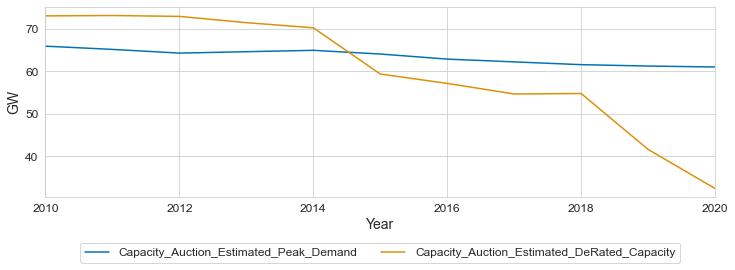

In [1043]:
sytemEvolution.columns
f, ax = plt.subplots(figsize=figsize)
(sytemEvolution[['Capacity_Auction_Estimated_Peak_Demand_kW', 'Capacity_Auction_Estimated_DeRated_Capacity_kW']]/1000000).plot(ax=ax)
ax.margins(0, None)
ax.set_xlabel('Year')
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_ylabel('GW')

handles, labels = ax.get_legend_handles_labels()
labels = [l.replace("_kW", "") for l in labels]
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=5)
f.savefig(path_save_figures+os.path.sep+"Capacity_Auction_Peak_demand."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

## Demand

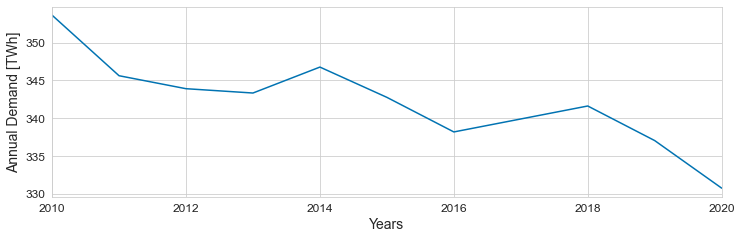

In [1044]:
f, ax = plt.subplots(figsize=figsize)

(demand_df.sum()/1000000000).plot(ax=ax)
ax.margins(0, None)
ax.set_xlabel("Years")
ax.set_ylabel("Annual Demand [TWh]")
# ax.set_ylim(0, None)

f.savefig(path_save_figures+os.path.sep+"Annual_demand."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)


In [1045]:
file = "capacityPerCompanies2010.csv"

In [1046]:
test_df = sytemEvolution.loc[2010, :].copy()
test_df = test_df.to_frame().T
test_df

,Capacity_kW,Derated_Capacity_kW,Storage_Capacity_kWh,Capacity_Margin_%,Derated_Capacity_Margin_%,Peak_Demand_kW,Emissions_kgCO2,Carbon_Intensity_Target_gCO2/kWh,Carbon_Intensity_gCO2/kWh,Carbon_Price_£/tCO2,Generation_kWh,Capacity_Auction_Estimated_Peak_Demand_kW,Capacity_Auction_Estimated_DeRated_Capacity_kW
2010,89532950.0,72850160.8,0.0,0.449652,0.179536,61761700.0,2.044266e+11,250.0,578.039952,14.0,3.536548e+11,65945000.0,73081760.8


In [1047]:
test_df["Peak_Demand_kW"].mean()

61761700.0

## Economic aspects

In [1048]:
frames = []
for year in range(2010, last_year, 1):
    temp_filename = "PlantsEconomics_"+str(year)+".csv"
    temp_df = pd.read_csv(path_results+os.path.sep+temp_filename, index_col=0, header=[0,1,2])
    temp_df.columns.names = ["Company", "Technology", "Index"]
    temp_df = temp_df.T.groupby(level=[1]).mean().reset_index()
    temp_df["Year"] = year
    frames.append(temp_df)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\OneDrive - Cardiff University\\04 - Projects\\18 - ABM\\01 - Code\\ABM code - Dec 2021\\Code_WH\\Results\\2050\\PlantsEconomics_2010.csv'

In [ ]:
plant_data = pd.concat(frames, axis=0)
plant_data.columns

In [ ]:
plant_data.loc[plant_data["Technology"] == tech, :]

In [ ]:
tech = "CCGT"
for c in ['Income_GBP', 'Cost_GBP', 'NPV_GBP', 'ROI','Capacity_Factor', 'Income_GBP/kWh', 'Capital_Subsidy_GBP/kW','CfD_Subsidy_GBP/kWh']:
    f, ax = plt.subplots(figsize=figsize)
    x_arr = plant_data.loc[plant_data["Technology"] == tech, "Year"].values
    y_arr = plant_data.loc[plant_data["Technology"] == tech, c].values
    ax.plot(x_arr, y_arr)
    ax.set_title(c)

In [ ]:
income_df = pd.concat(frames_income, axis=1)
income_df.columns = np.arange(2010, last_year)
income_df

f, ax = plt.subplots(figsize=figsize)
income_df.T["CCGT"].plot(ax=ax)

In [ ]:
income_df = pd.concat(frames_income, axis=1)
income_df.columns = np.arange(2010, last_year)
income_df

f, ax = plt.subplots(figsize=figsize)
ax2 = ax.twinx()
df_gen.T["CCGT"].plot(ax=ax2, color=sns.color_palette()[1])
income_df.T["CCGT"].plot(ax=ax)
ax2.grid(False)

In [ ]:
NPV_df = pd.concat(frames_NPV, axis=1)
NPV_df.columns = np.arange(2010, last_year)
NPV_df

In [ ]:
f, ax = plt.subplots(figsize=figsize)
NPV_df.T["CCGT"].plot(ax=ax)

In [ ]:
f, ax = plt.subplots(figsize=figsize)
NPV_df.T.plot(ax=ax)

ax.legend(bbox_to_anchor=(0.5, -0.24), loc='upper center', borderaxespad=0., ncol=5)


In [ ]:
    path_technology_dataset = r'D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM code - Dec 2021\Code_WH'

    # list of generation technologies
    technoloy_dataset_fn = "technology_technical_economic_parameters.xlsx"
busbarConstraints = pd.read_excel(path_technology_dataset+os.path.sep+technoloy_dataset_fn, sheet_name = "Bus constraints", index_col=0)
busbarConstraints.fillna(0, inplace=True)

In [ ]:
test_dict = {'a':2, 'b':5}
for k in test_dict.keys():
    test_dict[k] += 2


In [ ]:
test_dict

In [ ]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

numValues = 10000
maxValue = 1
skewness = -20   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
# random = random * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,30,density=True, color = 'red', alpha=0.1)
plt.show()

In [ ]:
np.mean(random)

In [ ]:
test_list = [1,2,3]
test_list2 = [4,5,6]
for i in test_list+test_list2:
    if i ==2:
        test_list.remove(i)
    

In [ ]:
yearlyProfit = 10
discountR = 0.1
lifetime = 25
capitalCost = 100
yearlyProfit*(1-(1+discountR)**-lifetime)/discountR + capitalCost

In [ ]:
getWholesalePriceOfFuel(path, "NaturalGas", 2010)


In [ ]:
minNuclearOpCap = 1000*0.65
arr_minNuclearOpCap = np.zeros(8760)+minNuclearOpCap

In [ ]:
arr_minNuclearOpCap[151*24:243*24] = 0


In [ ]:
f, ax = plt.subplots(figsize=figsize)
x_arr = np.arange(8760)
ax.plot(x_arr, arr_minNuclearOpCap)
